In [101]:
# library
library(ggridges)
library(ggplot2)
library(dplyr)
library(reshape2)
library(stringr)

In [137]:
ll_df <- read.csv("/storage/ficzere/results/ll_df.csv", header = TRUE, sep = ",")
norm_f_df <- read.csv("/storage/ficzere/results/norm_factor_df.csv", header = TRUE, sep = ",")
prob_stat_df <- read.csv("/storage/ficzere/results/prob_stat_df.csv", header = TRUE, sep = ",")

In [239]:
colnames(ll_df)[1] = c('Soccer')

In [240]:
mns <- colMeans(ll_df, na.rm=TRUE)
order(mns)
ll_df <- ll_df[,order(mns)]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27

In [241]:
ll_melt <- melt(ll_df, id = 'X')
colnames(ll_melt) <- c('X', 'Sport', 'logprobability')
ll_melt$Sport <- str_replace_all(ll_melt$Sport,'\\.',' ')
ll_melt$Sport<-factor(ll_melt$Sport,unique(ll_melt$Sport))
tail(ll_melt)

,X,Sport,logprobability
,<int>,<fct>,<dbl>
2595,94,Badminton,-462.5266
2596,95,Badminton,-454.0812
2597,96,Badminton,-456.4558
2598,97,Badminton,-483.8365
2599,98,Badminton,-474.5933
2600,99,Badminton,-482.0919


Picking joint bandwidth of 5.16



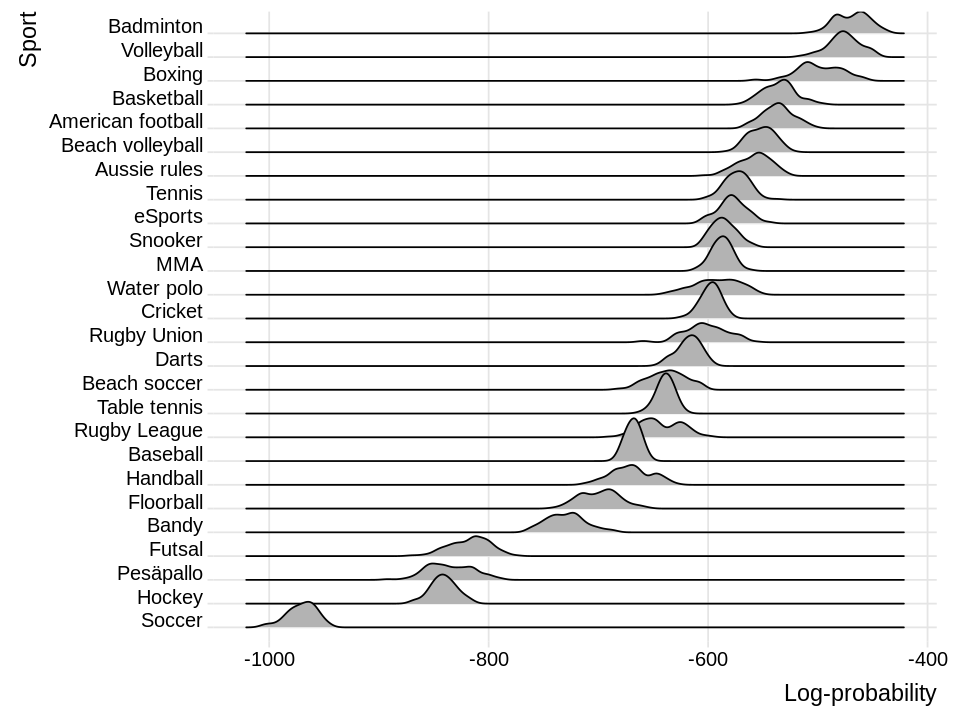

In [245]:
# basic example
options(repr.plot.width = 8, repr.plot.height =6)
ggplot(ll_melt, aes(x = logprobability, y = Sport)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") +
    labs(x = "Log-probability")

In [138]:
head(norm_f_df)
head(prob_stat_df)

,X,count,mean,std,min,X25.,X50.,X75.,max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American football,17981,1.049337,0.01290421,0.4626490,1.044196,1.048646,1.053274,1.247563
2,Aussie rules,7086,1.063090,0.01090497,1.0144742,1.056452,1.061681,1.069773,1.178755
3,Badminton,46124,1.068979,0.01269865,0.7788162,1.062937,1.070621,1.077193,1.258716
4,Bandy,12042,1.096890,0.02406631,0.1757326,1.087435,1.095047,1.107843,1.232692
5,Baseball,116509,1.056448,0.01402620,0.3708472,1.045527,1.056185,1.066017,1.262448
6,Basketball,208159,1.067953,0.01468266,0.3435817,1.061195,1.068849,1.075979,1.250000


,X,count,mean,std,min,X25.,X50.,X75.,max,median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American football,18033,-536.4141,14.206946,-565.7223,-546.0071,-536.3910,-528.3436,-500.8386,-536.3910
2,Aussie rules,7097,-558.0460,15.277871,-602.8391,-569.0223,-556.3480,-547.5965,-527.6547,-556.3480
3,Badminton,46355,-468.6815,15.298671,-508.1293,-482.0722,-466.7795,-457.9502,-437.0794,-466.7795
4,Bandy,12045,-729.5171,17.662780,-764.0672,-742.7184,-729.5411,-719.1203,-685.6103,-729.5411
5,Baseball,117155,-668.4191,6.273809,-683.3741,-672.9621,-667.5250,-664.1170,-654.8616,-667.5250
6,Basketball,208434,-535.2776,14.932480,-570.9626,-545.4970,-534.3069,-525.9085,-495.0330,-534.3069


In [228]:
plot_df <- data.frame(norm_f_df$X, norm_f_df$X50., prob_stat_df$mean, norm_f_df$X25., norm_f_df$X75.)
colnames(plot_df) = c('sport', 'norm_median', 'prob', 'norm_25', 'norm_75')
plot_df[13,1] = c('Soccer')
plot_df

sport,norm_median,prob,norm_25,norm_75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
American football,1.048646,-536.4141,1.044196,1.053274
Aussie rules,1.061681,-558.0460,1.056452,1.069773
Badminton,1.070621,-468.6815,1.062937,1.077193
Bandy,1.095047,-729.5171,1.087435,1.107843
Baseball,1.056185,-668.4191,1.045527,1.066017
Basketball,1.068849,-535.2776,1.061195,1.075979
Beach soccer,1.093981,-637.3391,1.081694,1.099475
Beach volleyball,1.077818,-551.4673,1.070231,1.085548
Boxing,1.091150,-499.0741,1.079517,1.101815


In [231]:
#install.packages("ggrepel")
library("ggrepel")

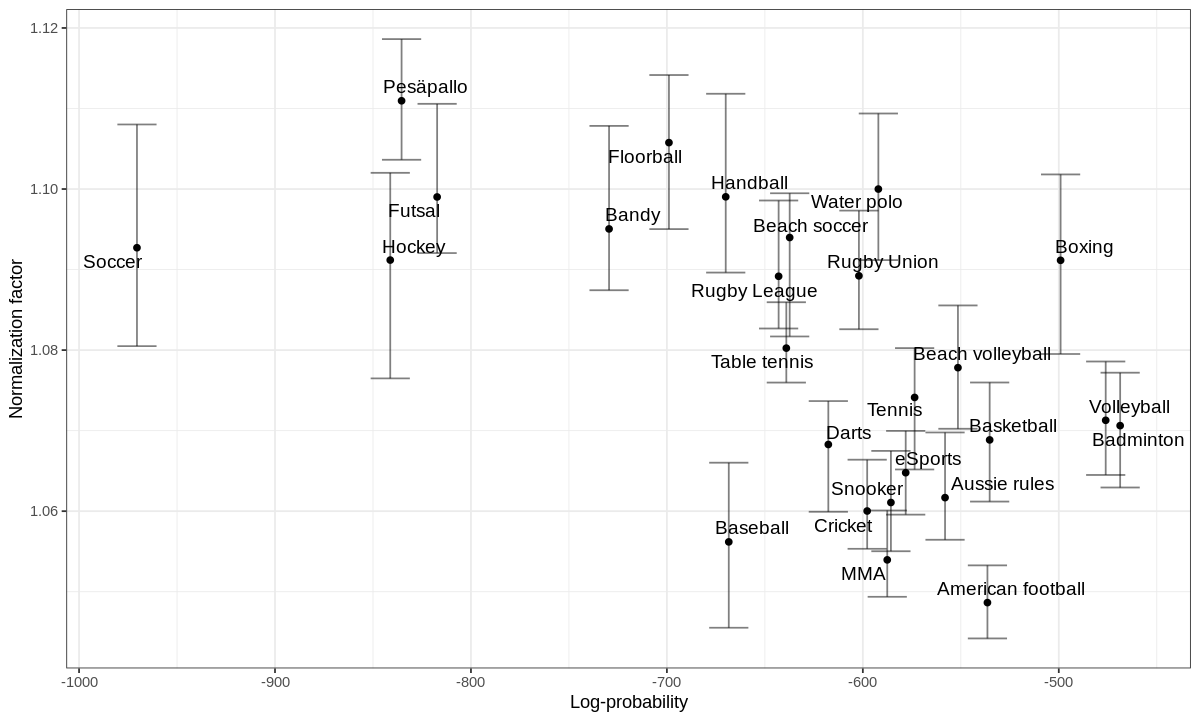

In [232]:
options(repr.plot.width = 10, repr.plot.height =6)

p<- ggplot(data = plot_df, aes(x = prob, y = norm_median, label = sport)) + 
    theme_bw() +
  geom_point() +
 #geom_pointrange(aes(ymin=norm_25, ymax=norm_75))
    geom_errorbar(aes(ymin=norm_25, ymax=norm_75), width=20, alpha = 0.5) +
    labs(x = "Log-probability", y="Normalization factor") +
    geom_text_repel(aes(label = sport), size = 4)
    
print(p)
#geom_text(position=position_jitter(width=0,height=0.005))